In [3]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca

In [4]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421_0.npy'
coll=ca.NPYreader(filename,True).get_event()

In [5]:
#Despite the energy,the events with A/E <1.6e-2 should be mostly MSE

cutmin=0; cutmax=1.6e-2;
coll1=coll.subset('ae',cutmin,cutmax)

In [6]:
nbits=14
nbins=2**14-1
calVec = [-0.090383+ 0.20574*i for i in range(2**14+1)]

<IPython.core.display.Javascript object>


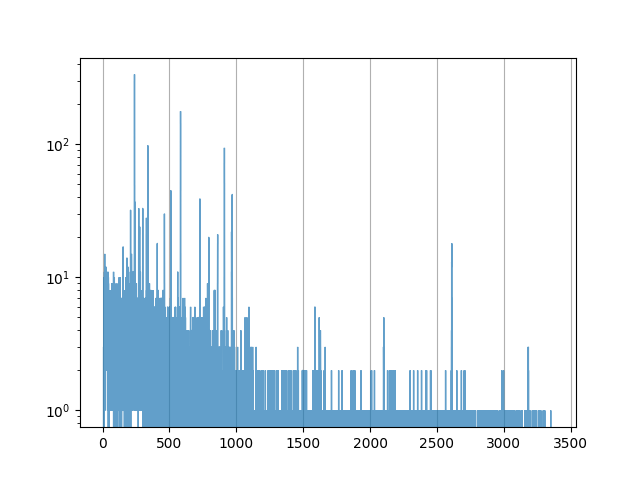

In [7]:
plt.figure()
plt.hist(coll1.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')

In [8]:
cutmin=1.6e-2
coll2=coll.subset('ae',cutmin)

<IPython.core.display.Javascript object>


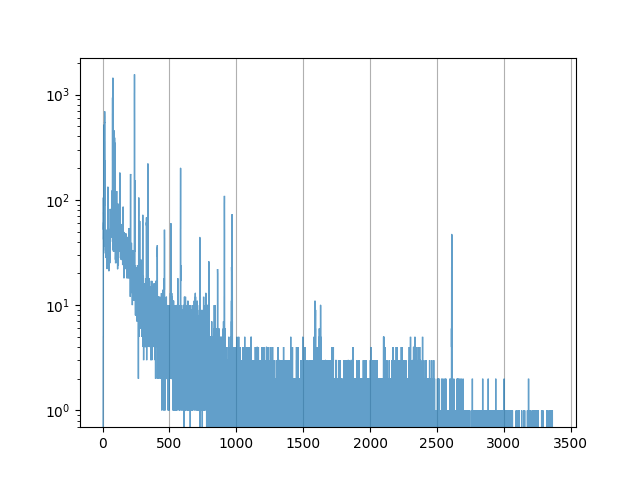

In [9]:
plt.figure()
plt.hist(coll2.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')

<IPython.core.display.Javascript object>


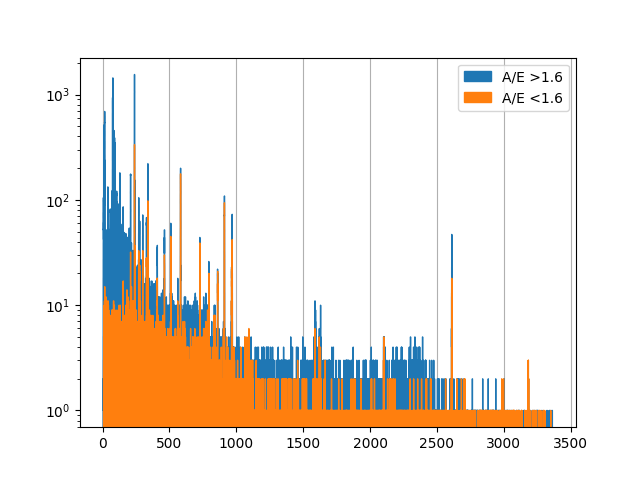

In [10]:
plt.figure()
plt.hist(coll2.get_energies(), bins=calVec, histtype='step',label='A/E >1.6',fill=True,)
plt.hist(coll1.get_energies(), bins=calVec, histtype='step',label='A/E <1.6',fill=True,)

plt.legend(loc='upper right')
plt.semilogy()
plt.grid(axis='x')

<IPython.core.display.Javascript object>


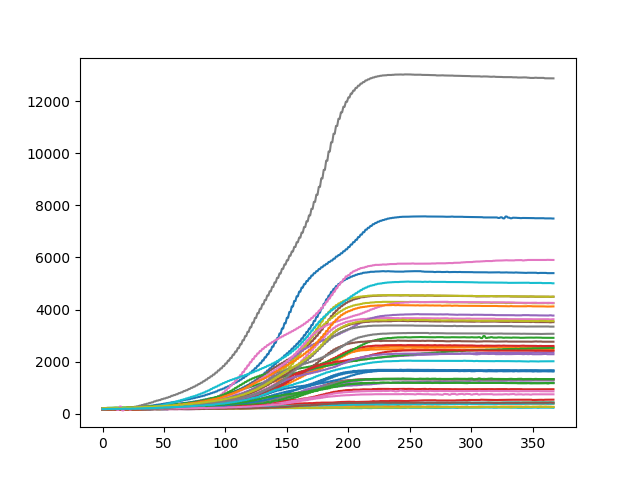

In [11]:
#Expected mostly MSE
trace=coll1.get_traces()
plt.figure()
for i in range(50):
    plt.plot(trace[i,:])

<IPython.core.display.Javascript object>


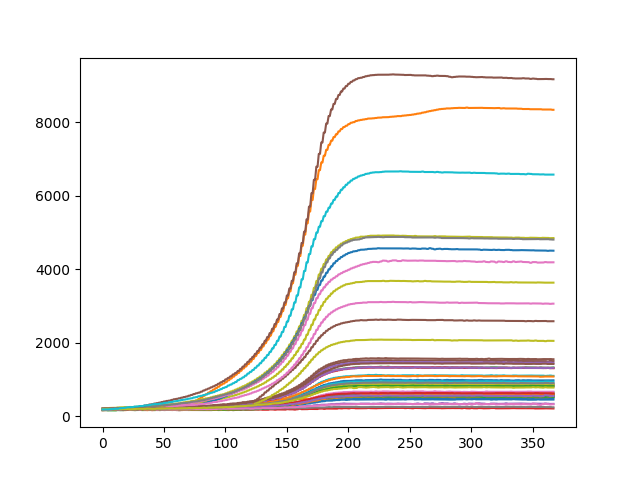

In [12]:
#Expected mostly SSE
trace=coll2.get_traces()
plt.figure()
for i in range(50):
    plt.plot(trace[i,:])

In [13]:
#2615keV is photo-peak of 208Tl.
cutmin=2607; cutmax=2619;
coll3=coll1.subset('energy',cutmin,cutmax) #ae<1.6
coll4=coll2.subset('energy',cutmin,cutmax) #ae>1.6

<IPython.core.display.Javascript object>


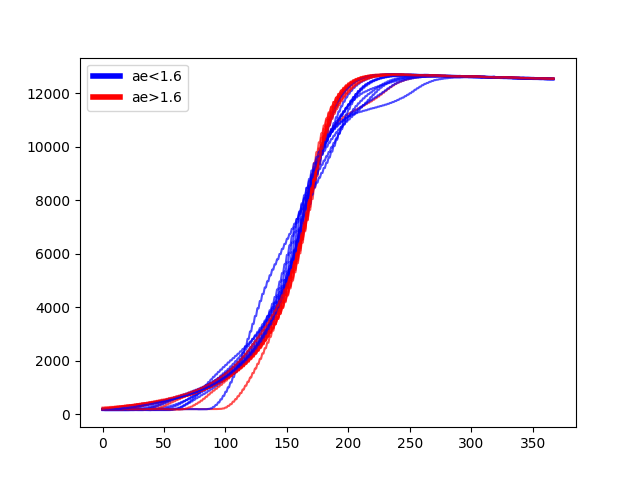

In [24]:
trace3=coll3.get_traces()
trace4=coll4.get_traces()
plt.figure()
for i in range(10):
    plt.plot(trace3[i,:],color='b',alpha=0.7)
    plt.plot(trace4[i,:],color='r',alpha=0.7)

custom_line=[Line2D([0],[0],color='b',lw=4),Line2D([0],[0],color='r',lw=4)]    
plt.legend(custom_line,['ae<1.6','ae>1.6'],loc='upper left')